In [ ]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.legend_handler import HandlerTuple

import matplotlib as mpl

plt.rcParams.update({"text.usetex": True,
                     "font.family" : "serif",
                     "font.serif" : ["Computer Modern Serif"]})
#mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
#! sudo apt-get update
#! sudo apt-get install texlive texlive-latex-extra texlive-fonts-recommended

In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
"""! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash"""

'! sudo apt-get install texlive-latex-recommended\n! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended\n! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip\n! unzip type1cm.zip -d /tmp/type1cm\n! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins\n! sudo mkdir /usr/share/texmf/tex/latex/type1cm\n! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm\n! sudo texhash'

In [ ]:
#!pip install latex

# Uniform

In [ ]:
instance_file = 'berlin_db=1.00_dt=uniform.json'
with open(instance_file) as f:
    data = json.load(f)

In [ ]:
all_area_scenarios = []
for scenario in data['scenarios']:
    for area_id in range(len(scenario['data'])):
        all_area_scenarios.append(scenario['data'][area_id])
all_area_scenarios_df = pd.DataFrame(all_area_scenarios)
area_ids = list(all_area_scenarios_df['area_id'].unique())
all_area_scenarios_df = all_area_scenarios_df.query(f'area_id == "{area_ids[area_id]}"')

for period in range(8):
    all_area_scenarios_df[f'demand_{period}'] = all_area_scenarios_df['demand'].apply(lambda x: int(x[period]) )
    all_area_scenarios_df[f'required_couriers_{period}'] = all_area_scenarios_df['required_couriers'].apply(lambda x: int(x[period]) )

melt_df = pd.melt(all_area_scenarios_df, id_vars='area_id', value_vars=[f'demand_{period}' for period in range(8)])
melt_df['period'] = melt_df['variable'].apply(lambda x: int(x.split('_')[-1]))
uniform_df = melt_df.groupby('period').agg({'value': 'sum'}).reset_index()

# Double peak

In [ ]:
instance_file = 'berlin_db=1.00_dt=doublepeak.json'
with open(instance_file) as f:
    data = json.load(f)

all_area_scenarios = []
for scenario in data['scenarios']:
    for area_id in range(len(scenario['data'])):
        all_area_scenarios.append(scenario['data'][area_id])
all_area_scenarios_df = pd.DataFrame(all_area_scenarios)
all_area_scenarios_df = all_area_scenarios_df.query(f'area_id == "{area_ids[area_id]}"')

for period in range(8):
    all_area_scenarios_df[f'demand_{period}'] = all_area_scenarios_df['demand'].apply(lambda x: int(x[period]) )
    all_area_scenarios_df[f'required_couriers_{period}'] = all_area_scenarios_df['required_couriers'].apply(lambda x: int(x[period]) )

melt_df = pd.melt(all_area_scenarios_df, id_vars='area_id', value_vars=[f'demand_{period}' for period in range(8)])
melt_df['period'] = melt_df['variable'].apply(lambda x: int(x.split('_')[-1]))

doublepeak_df = melt_df.groupby('period').agg({'value': 'sum'}).reset_index()

In [ ]:
print(uniform_df['value'].sum())
print(doublepeak_df['value'].sum())

764
720


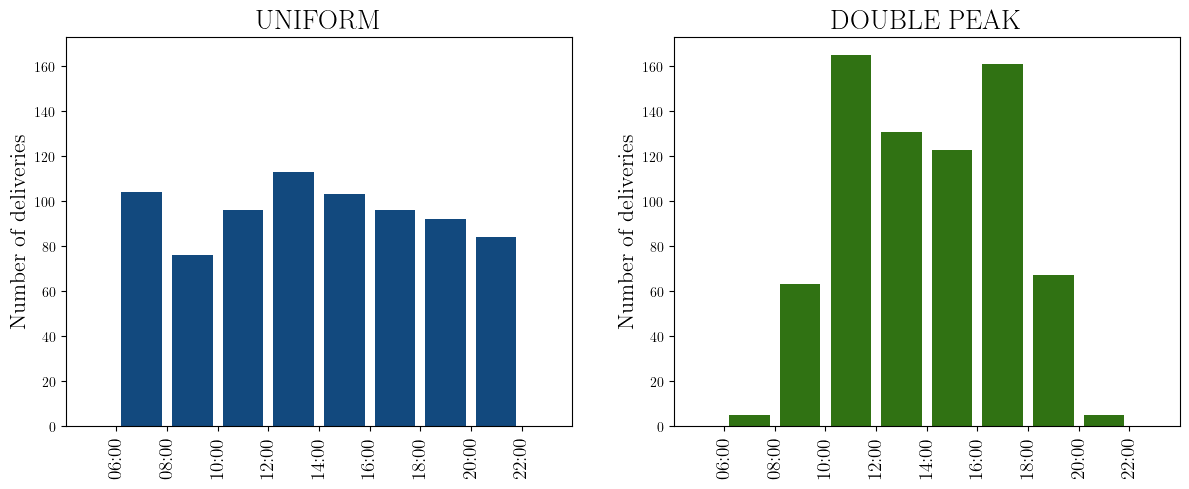

In [ ]:
plt.rcParams['hatch.linewidth'] = 2

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,5))

# XTICKS
hours = [6, 8, 10, 12, 14, 16, 18, 20, 22]
xtick_labels = [f'{hour:02d}:00' for hour in hours]
xtick_positions = [ i-1.5 for i in range(1, len(hours) + 1)]

sns.barplot(x=uniform_df['period'], y=uniform_df['value'],
            color='#004990', ax=axs[0], dodge=False)

# LABELS
axs[0].set_xlabel('')
axs[0].set_ylabel('Number of deliveries', fontsize=16)
#axs[0].yaxis.grid(which='major')
axs[0].axes.set_axisbelow(True)
axs[0].set_xlabel('')
axs[0].set_title('UNIFORM', fontsize=20)
axs[0].set_ylim(0, doublepeak_df['value'].max()*1.05)
axs[0].set_xticks(xtick_positions)
axs[0].set_xticklabels(xtick_labels, rotation=90, fontsize=14)

# Set left and right margins
axs[0].set_xlim(-1.5, len(hours) - 0.5)

sns.barplot(x=doublepeak_df['period'], y=doublepeak_df['value'],
            color='#2a8203', ax=axs[1], dodge=False)

# LABELS
axs[1].set_xlabel('')
axs[1].set_ylabel('Number of deliveries', fontsize=16)
#axs[1].yaxis.grid(which='major')
axs[1].axes.set_axisbelow(True)
axs[1].set_xlabel('')
axs[1].set_title('DOUBLE PEAK', fontsize=20)
axs[1].set_ylim(0, doublepeak_df['value'].max()*1.05)
axs[1].set_xticks(xtick_positions)
axs[1].set_xticklabels(xtick_labels, rotation=90, fontsize=14)

# Set left and right margins
axs[1].set_xlim(-1.5, len(hours) - 0.5)

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
fig.savefig('demand_distibution.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Region demand

In [ ]:
city = 'paris'

# plots
title_font = 25

In [ ]:
pt = pd.read_csv(f"demand_region_{city}_db=0.50.csv", index_col=0)
pt

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,0-7,1-0,1-1,...,5-6,5-7,6-0,6-1,6-2,6-3,6-4,6-5,6-6,6-7
region_id,,,,,,,,,,,,,,,,,,,,,
0,2.500000,24.633333,64.400000,47.633333,46.533333,63.100000,26.366667,2.900000,2.500000,24.633333,...,31.333333,34.833333,32.966667,32.200000,34.300000,35.266667,32.366667,32.766667,31.333333,34.833333
1,1.700000,19.333333,49.666667,35.800000,36.300000,48.400000,18.666667,2.333333,1.700000,19.333333,...,27.300000,27.033333,27.000000,27.333333,26.333333,27.233333,27.633333,28.366667,27.300000,27.033333
2,2.566667,30.533333,73.566667,54.366667,53.166667,72.900000,30.900000,2.933333,2.566667,30.533333,...,42.966667,42.400000,42.700000,42.566667,42.166667,41.500000,43.000000,44.366667,42.966667,42.400000
3,2.366667,26.400000,64.533333,49.466667,46.666667,65.466667,25.366667,3.066667,2.366667,26.400000,...,34.966667,36.366667,35.700000,36.333333,35.066667,36.866667,36.766667,38.266667,34.966667,36.366667


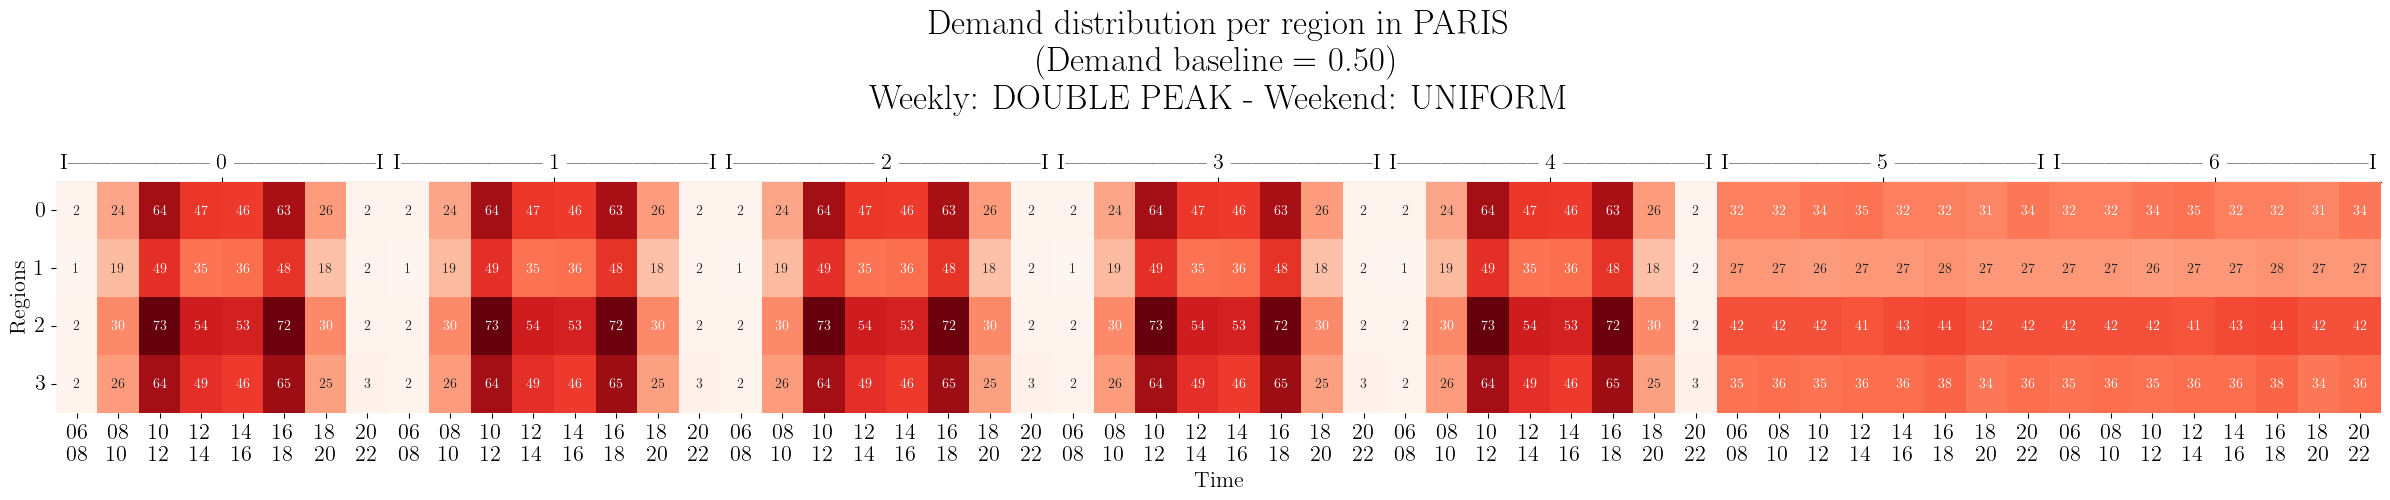

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,3))

sns.heatmap(pt.astype(int), annot=True, ax=axs, cbar=False, cmap='Reds', fmt='g')

title = f"Demand distribution per region in {city.upper()} \n (Demand baseline = 0.50) \n Weekly: DOUBLE PEAK - Weekend: UNIFORM \n "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Regions', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_region_demand_distibution.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Area demand

In [ ]:
pt = pd.read_csv(f"demand_area_{city}_db=0.50.csv", index_col=0)
pt
# pt = pd.pivot(deliveries_df_, index="area_id", columns='day_period', values='deliveries')

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,0-7,1-0,1-1,...,5-6,5-7,6-0,6-1,6-2,6-3,6-4,6-5,6-6,6-7
area_id,,,,,,,,,,,,,,,,,,,,,
75001,0.000000,0.833333,1.500000,1.300000,1.166667,1.400000,0.800000,0.200000,0.000000,0.833333,...,1.266667,0.800000,1.033333,0.866667,1.000000,0.800000,1.200000,0.933333,1.266667,0.800000
75002,0.166667,0.800000,2.200000,2.066667,1.766667,2.533333,0.866667,0.200000,0.166667,0.800000,...,1.466667,1.133333,1.433333,1.533333,1.566667,1.566667,1.200000,1.566667,1.466667,1.133333
75003,0.166667,1.533333,4.233333,2.966667,2.766667,4.400000,1.466667,0.133333,0.166667,1.533333,...,1.900000,2.233333,2.100000,2.200000,2.466667,1.733333,2.533333,1.800000,1.900000,2.233333
75004,0.100000,0.933333,2.933333,2.200000,2.333333,3.033333,1.233333,0.033333,0.100000,0.933333,...,1.600000,1.733333,1.633333,1.866667,2.000000,1.466667,1.933333,1.433333,1.600000,1.733333
75005,0.066667,2.700000,6.533333,4.933333,5.033333,6.233333,2.966667,0.200000,0.066667,2.700000,...,3.533333,4.300000,3.700000,3.800000,3.166667,3.133333,3.800000,3.866667,3.533333,4.300000
75006,0.300000,1.900000,5.066667,3.233333,3.200000,4.700000,2.133333,0.200000,0.300000,1.900000,...,2.566667,2.866667,3.266667,2.800000,2.966667,2.366667,2.133333,3.066667,2.566667,2.866667
75007,0.133333,2.300000,6.733333,4.633333,4.966667,6.200000,2.433333,0.266667,0.133333,2.300000,...,3.833333,3.666667,3.566667,3.766667,3.000000,3.900000,3.600000,3.533333,3.833333,3.666667
75008,0.133333,1.933333,4.666667,3.000000,3.166667,4.533333,1.700000,0.133333,0.133333,1.933333,...,3.033333,2.533333,1.966667,2.766667,2.466667,2.200000,2.500000,2.800000,3.033333,2.533333
75009,0.366667,2.400000,6.766667,5.066667,4.866667,6.700000,2.666667,0.300000,0.366667,2.400000,...,3.633333,4.466667,3.066667,4.000000,3.600000,4.100000,3.633333,4.066667,3.633333,4.466667


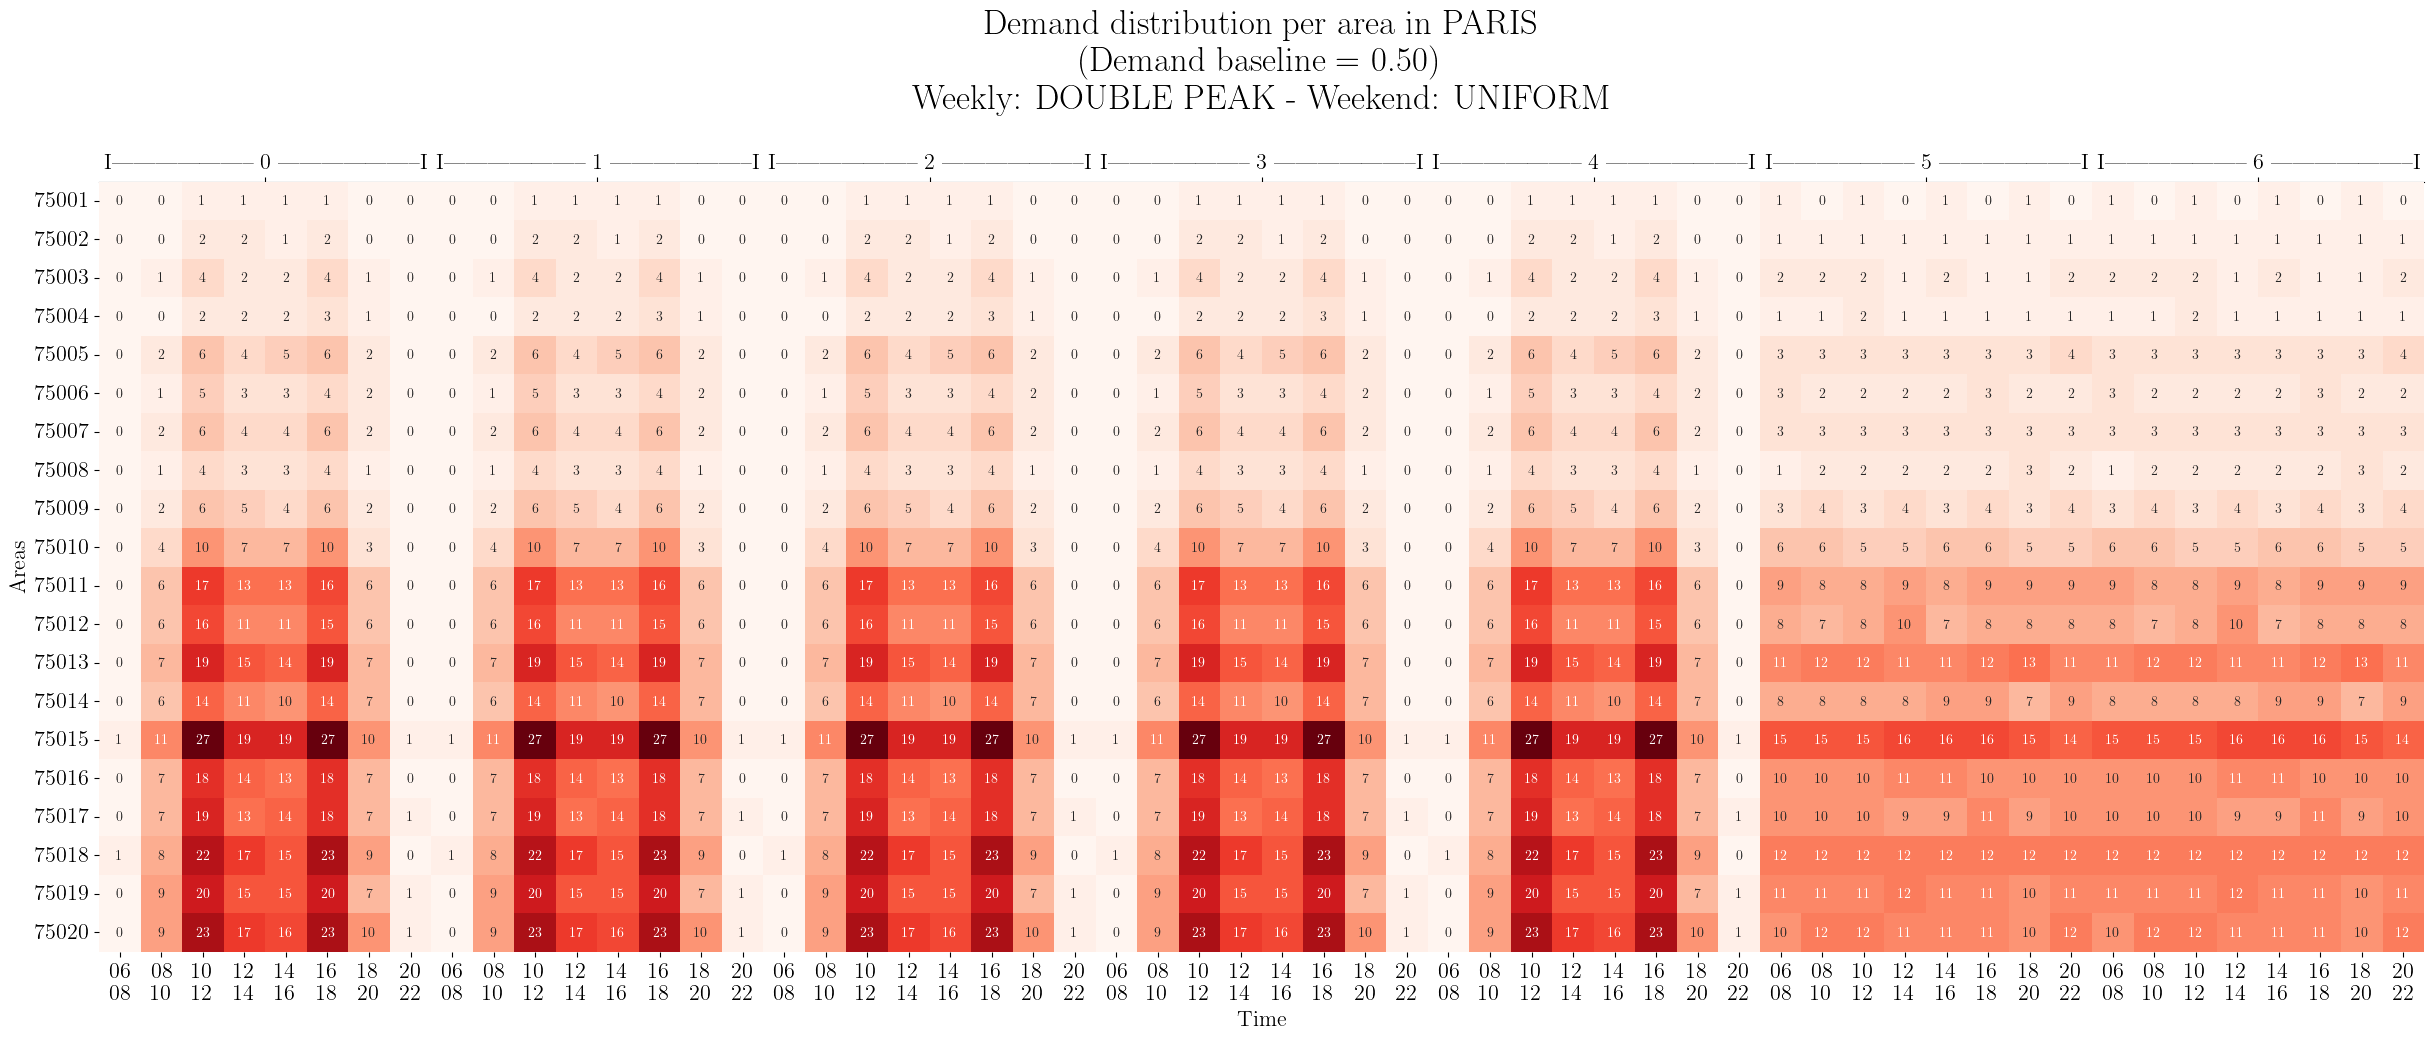

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(pt.astype(int), annot=True, ax=axs, cbar=False, cmap='Reds', fmt='g')

title = f"Demand distribution per area in {city.upper()} \n (Demand baseline = 0.50) \n Weekly: DOUBLE PEAK - Weekend: UNIFORM \n "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_area_demand_distibution.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Fixed

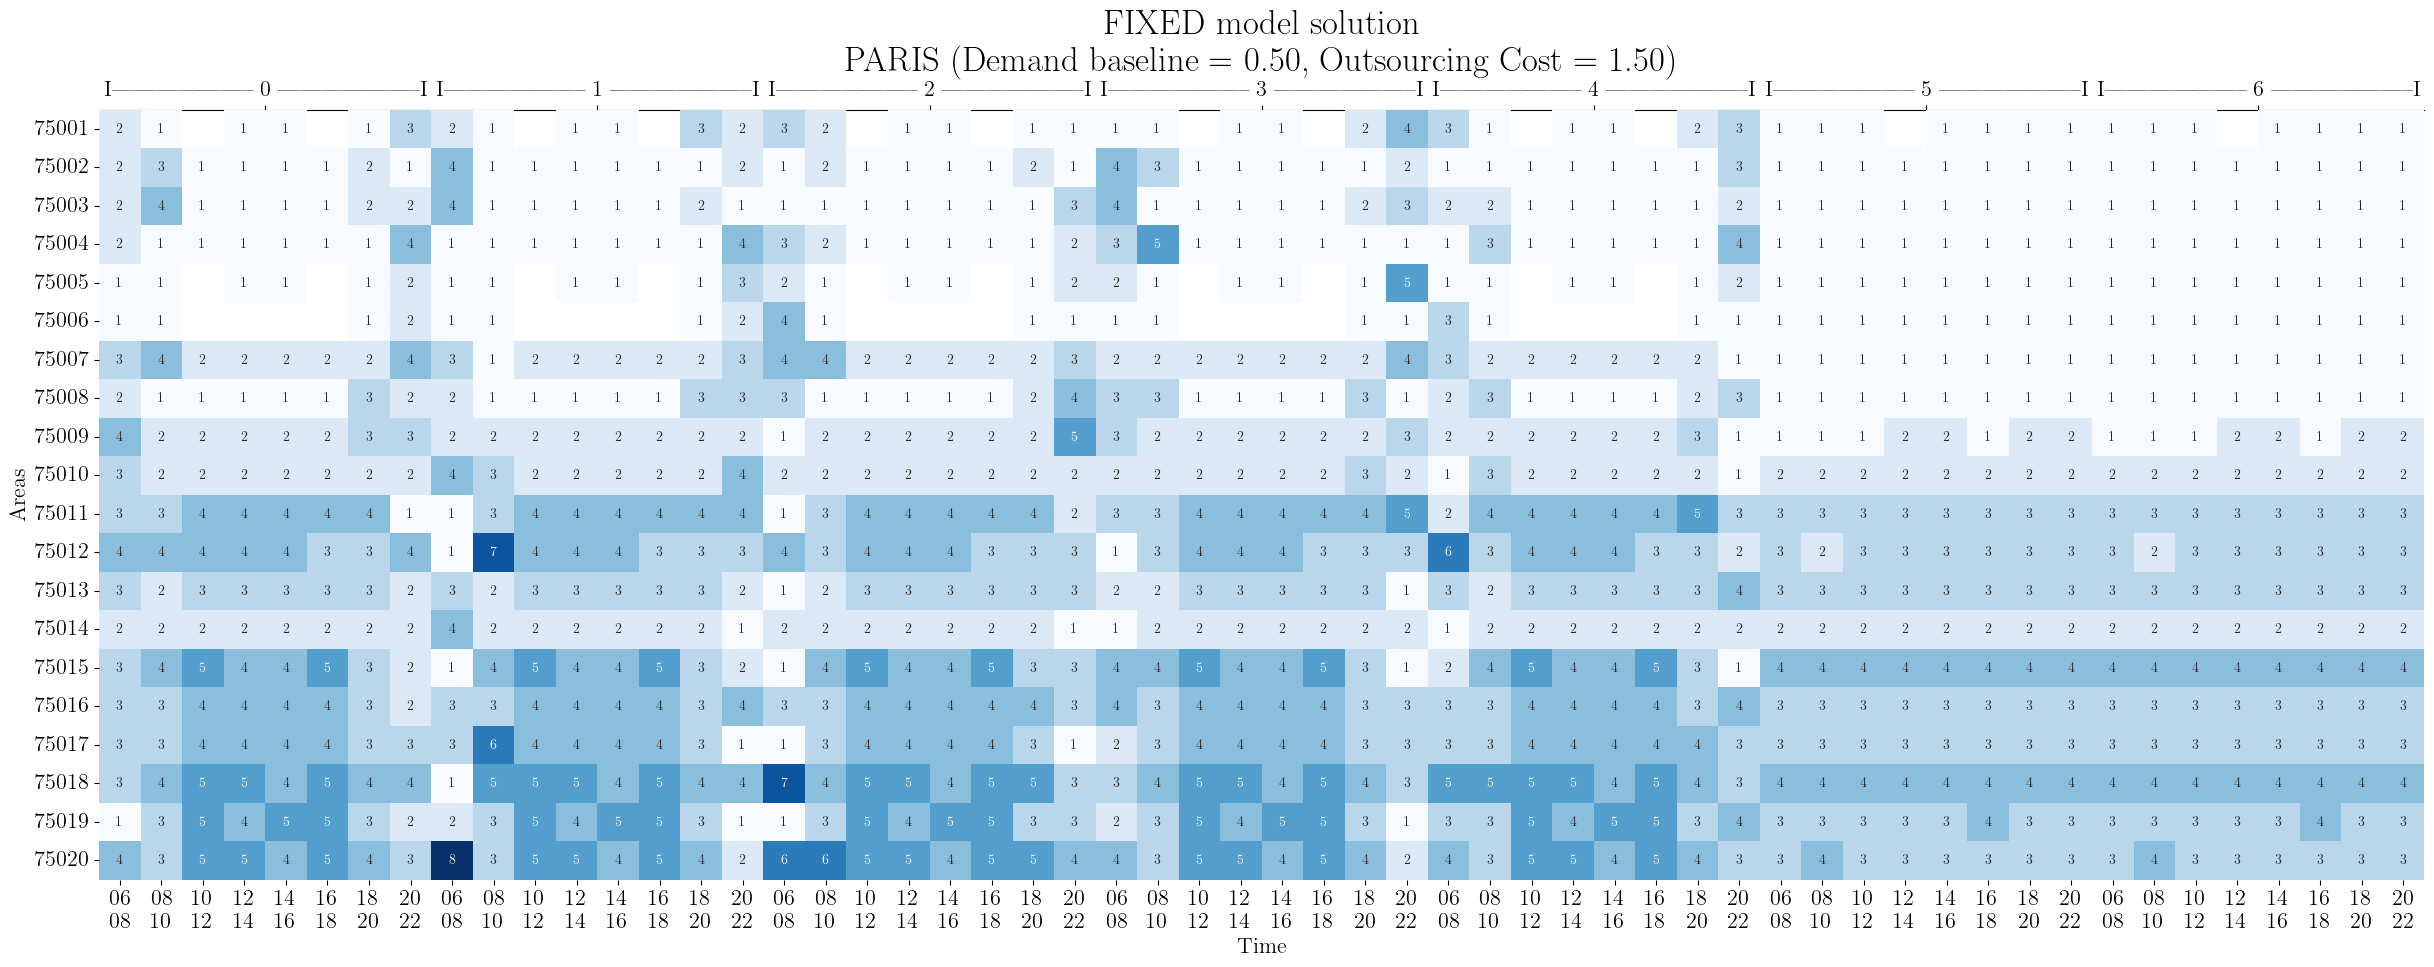

In [ ]:
data = pd.read_csv(f"/content/rostering_area_{city}_db=0.50_OC=1.5_model=fixed.pkl.csv", index_col=0)

pt = pd.pivot(data, index="area_id", columns='day_period', values="employee")

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

title = f"FIXED model solution \n {city.upper()} (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig('paris_area_fixed.pdf', dpi=96, bbox_inches='tight')

plt.show()

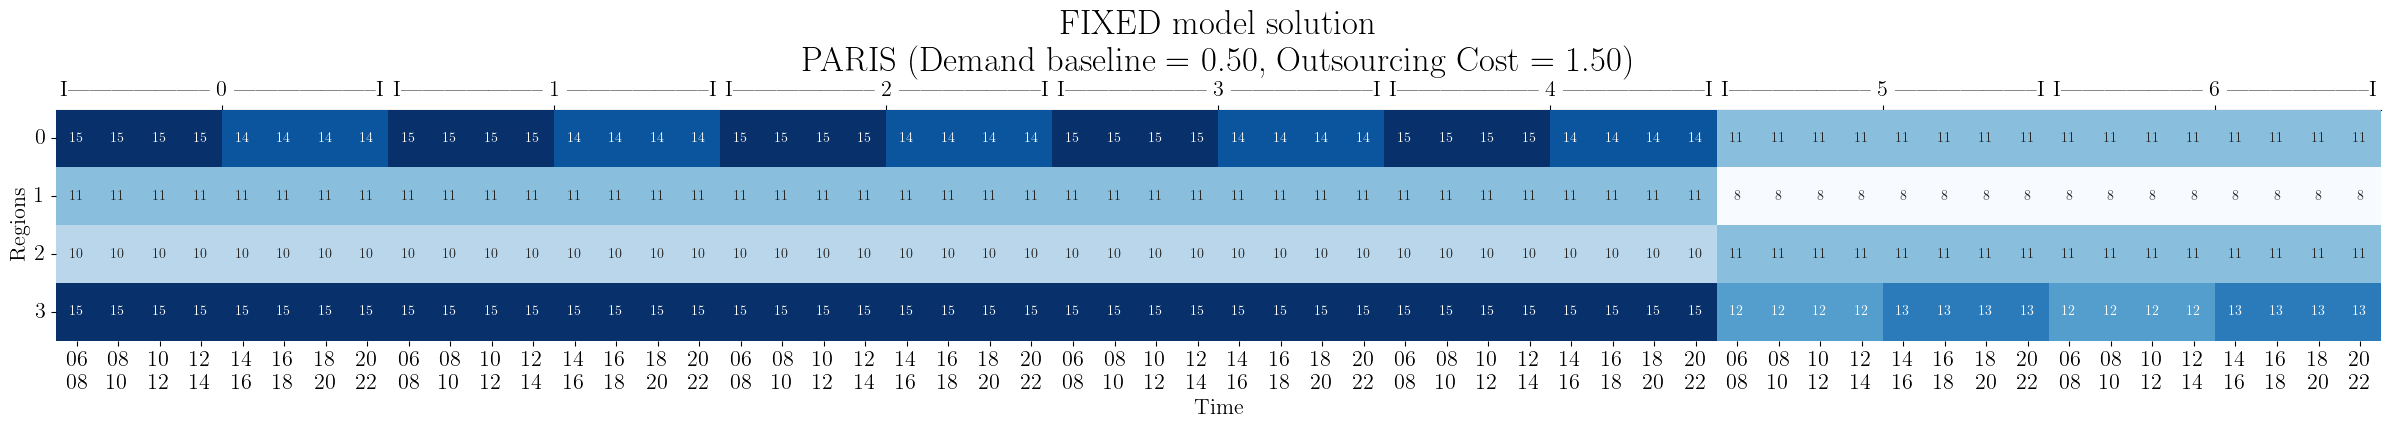

In [ ]:
data = pd.read_csv(f"/content/rostering_region_{city}_db=0.50_OC=1.5_model=fixed.pkl.csv", index_col=0)

pt = pd.pivot(data, index="region_id", columns='day_period', values="employee")

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,3))

sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

title = f"FIXED model solution \n {city.upper()} (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Regions', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_region_fixed.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Baseline

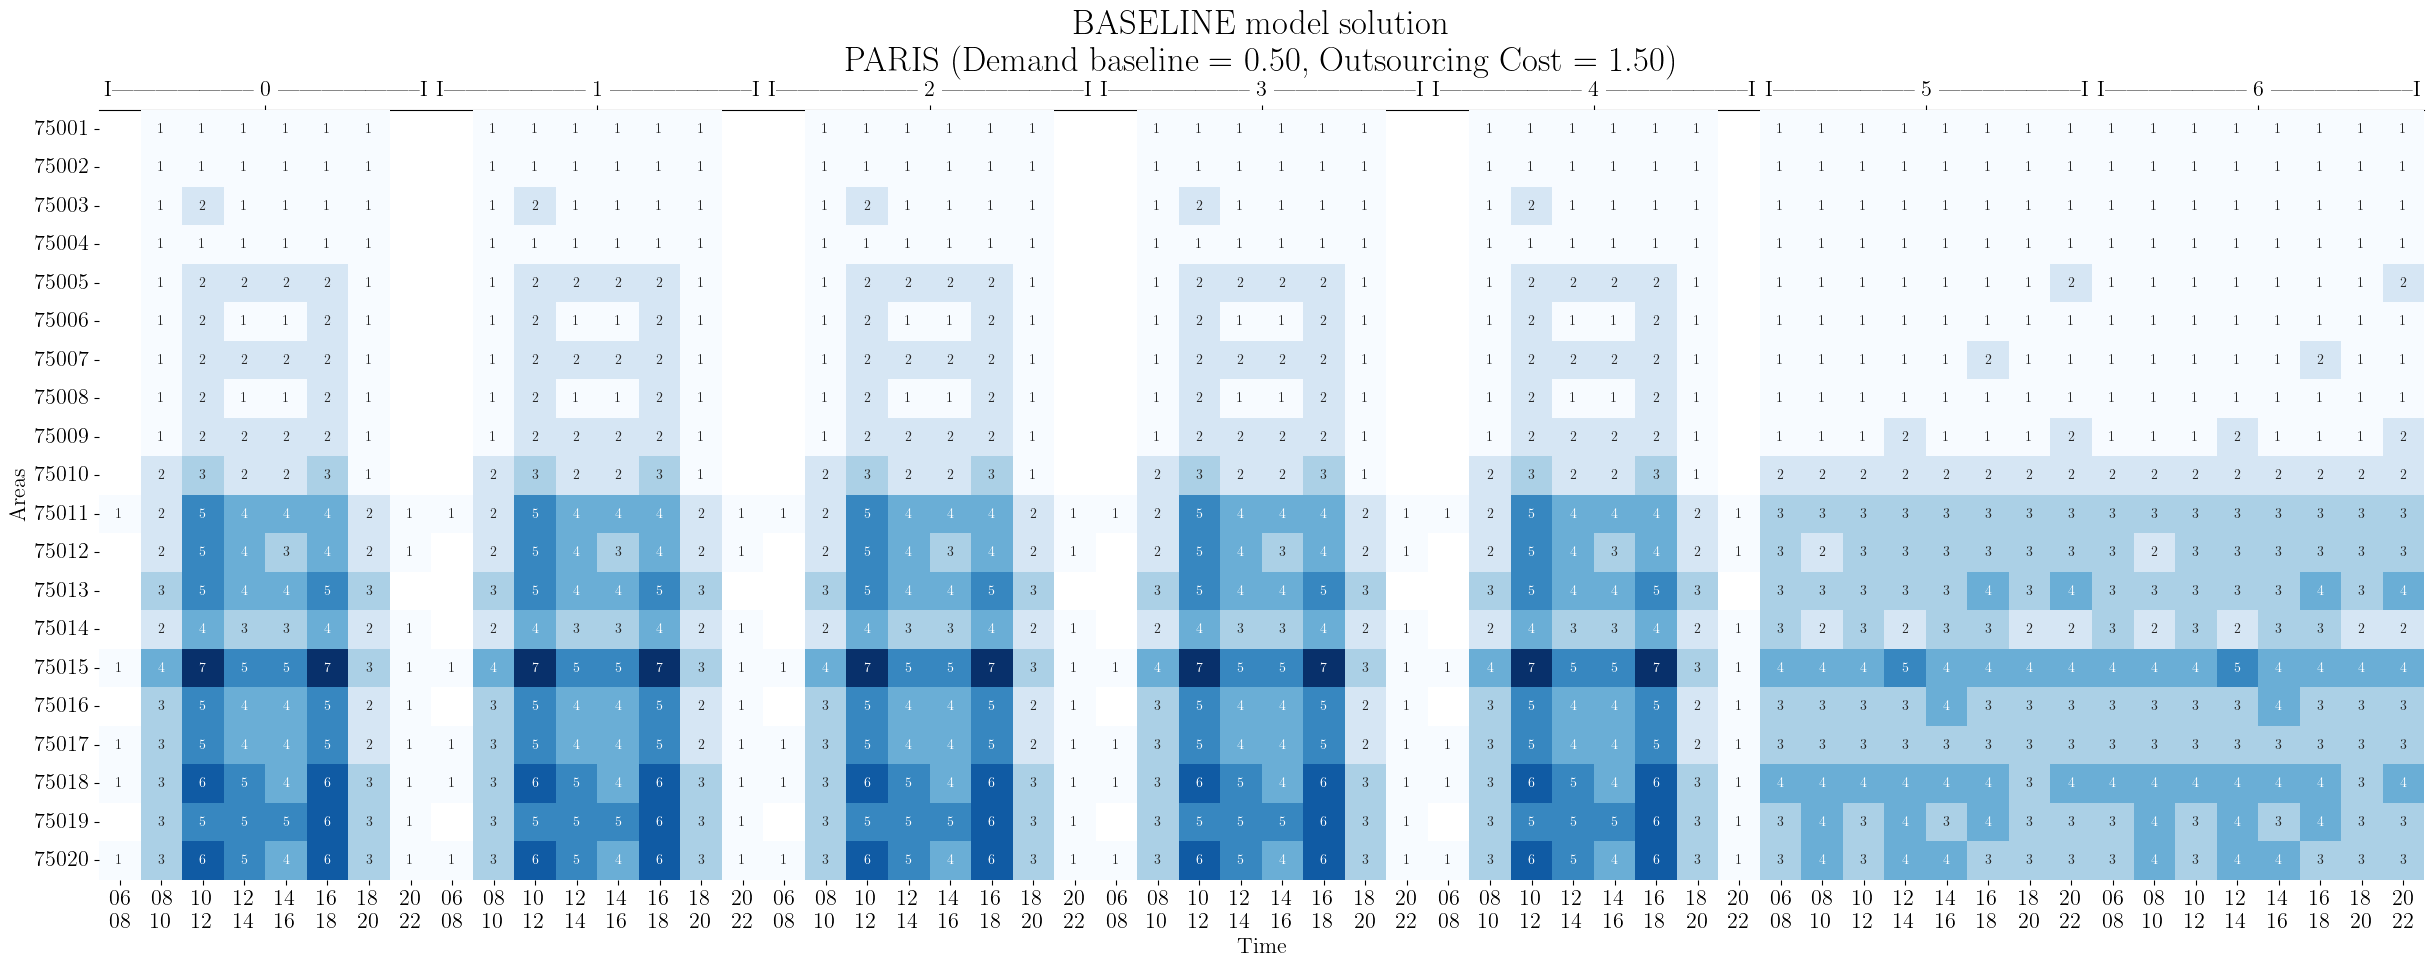

In [ ]:
data = pd.read_csv(f"/content/rostering_area_baseline_{city}_db=0.50_OC=1.5_model=fixed.pkl.csv", index_col=0)

pt = pd.pivot(data, index="area_id", columns='day_period', values="employee")

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

title = f"BASELINE model solution \n {city.upper()} (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_baseline.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Flex

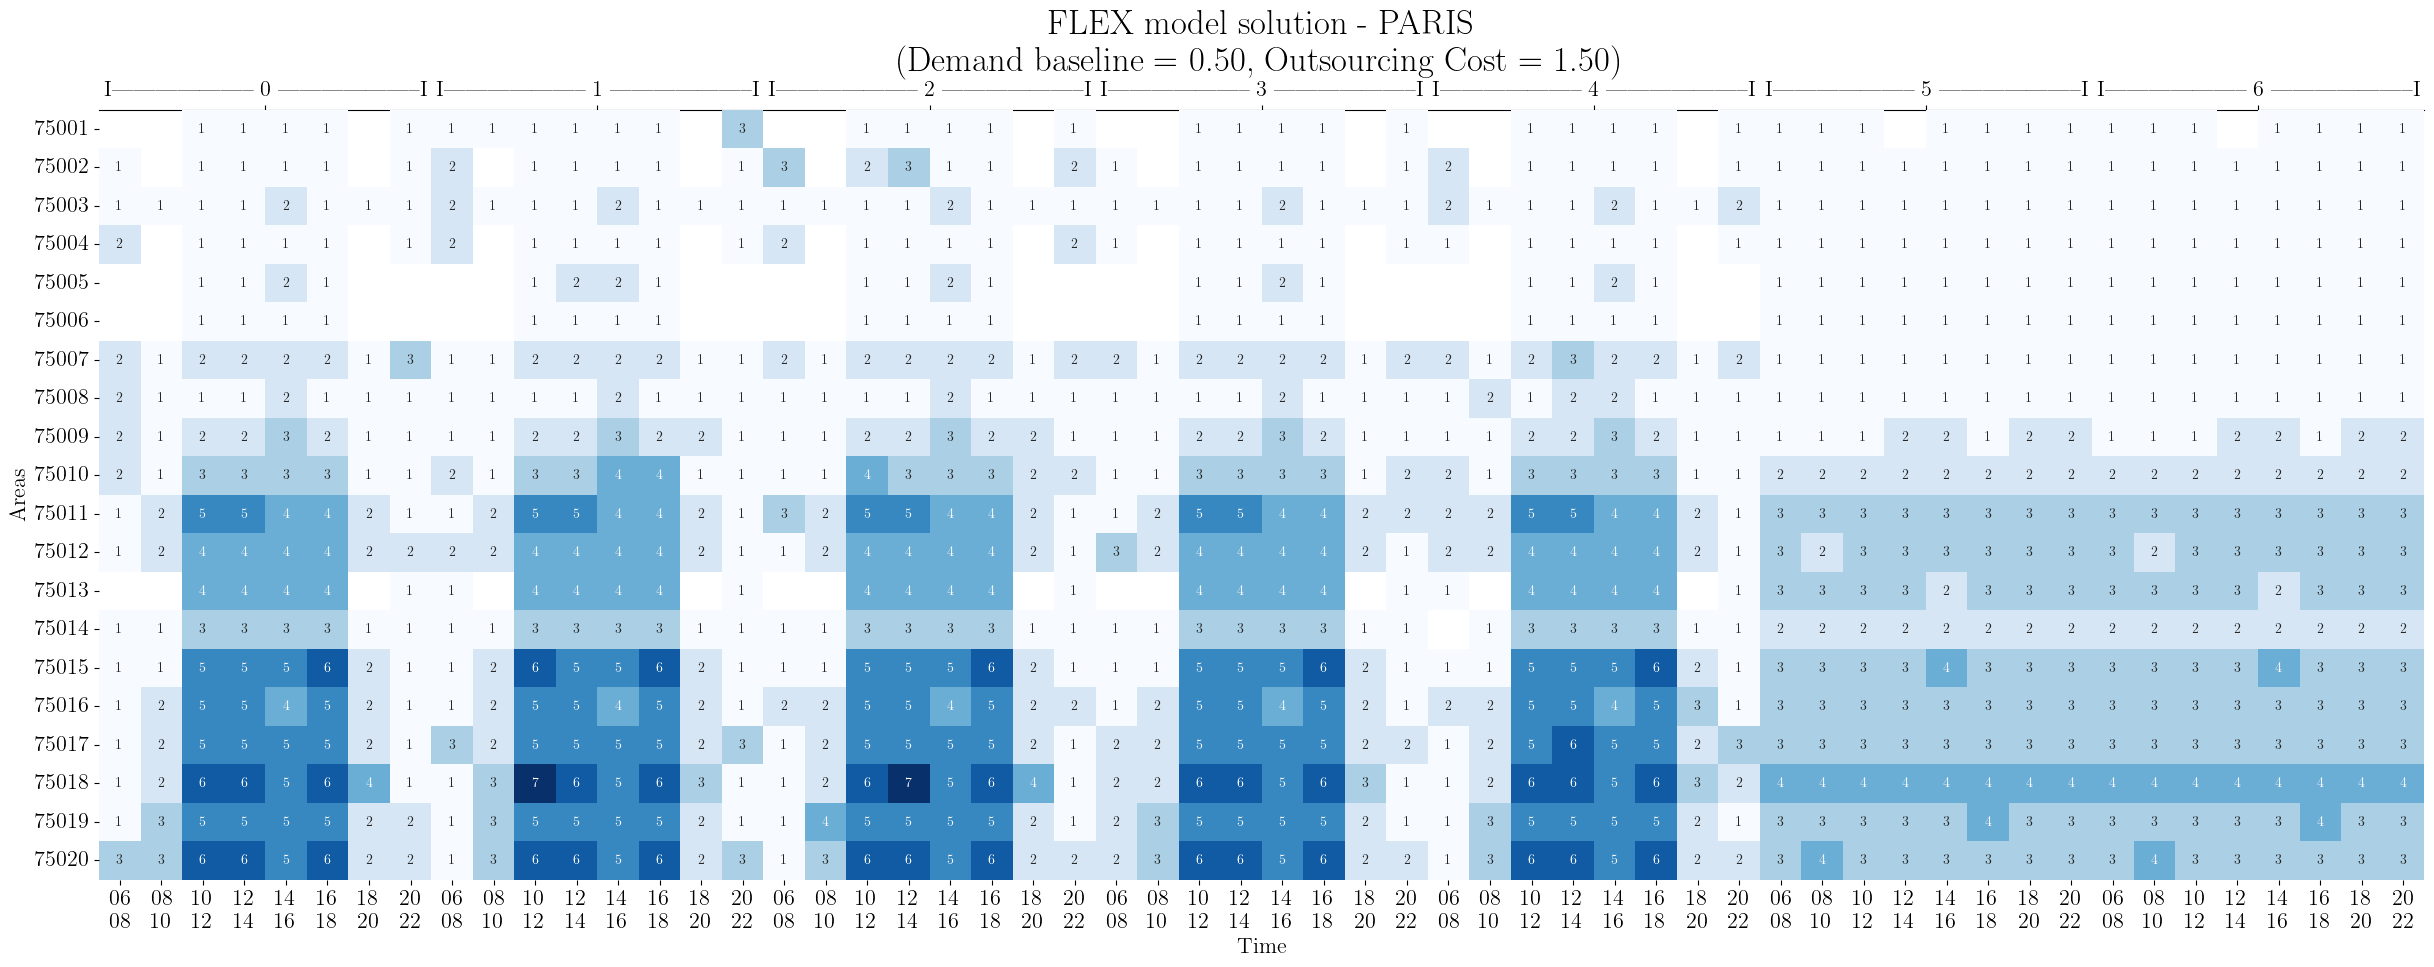

In [ ]:
data = pd.read_csv(f"/content/rostering_area_{city}_db=0.50_OC=1.5_model=flex.pkl.csv", index_col=0)
pt = pd.pivot(data, index="area_id", columns='day_period', values="employee")

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

title = f"FLEX model solution - {city.upper()} \n (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_area_flex.pdf', dpi=96, bbox_inches='tight')

plt.show()

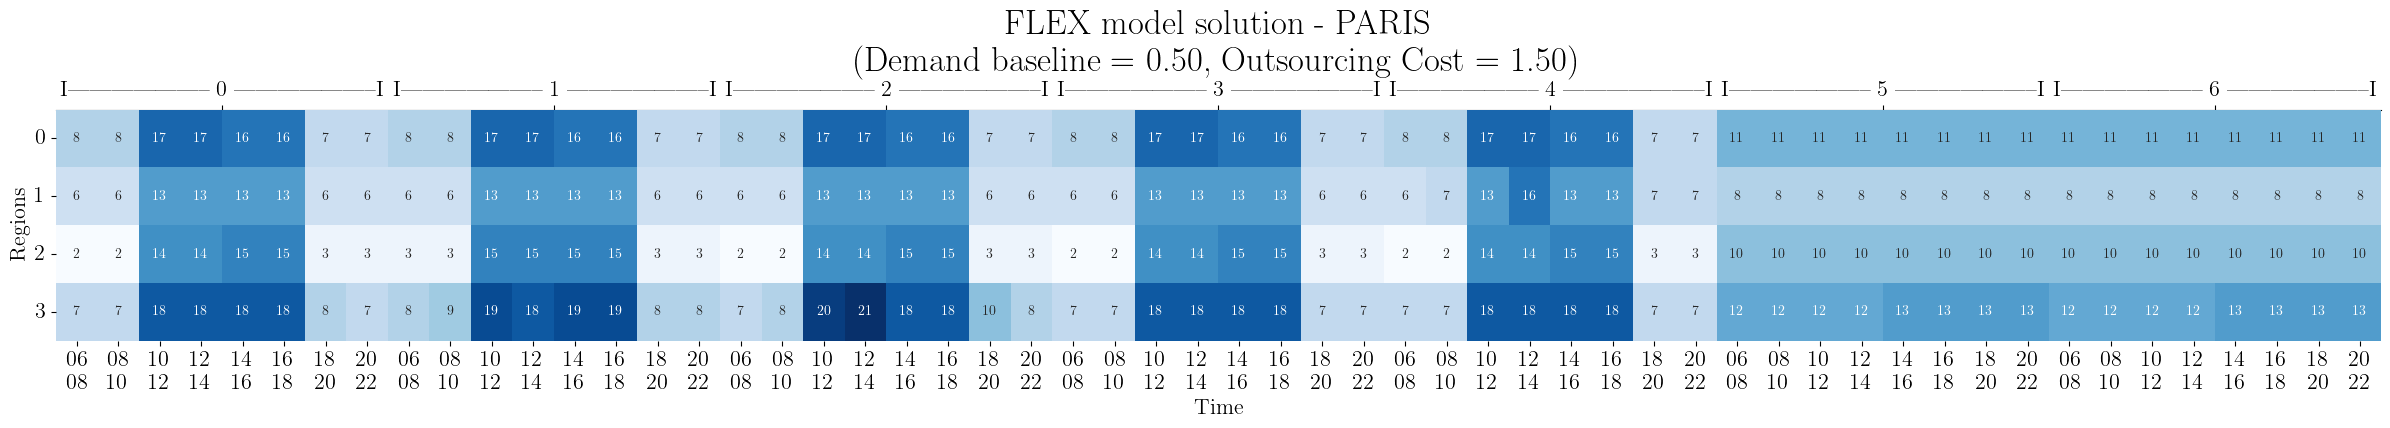

In [ ]:
data = pd.read_csv(f"/content/rostering_region_{city}_db=0.50_OC=1.5_model=flex.pkl.csv", index_col=0)
pt = pd.pivot(data, index="region_id", columns='day_period', values="employee")

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,3))

sns.heatmap(pt, annot=True, ax=axs, cbar=False, cmap='Blues')

title = f"FLEX model solution - {city.upper()} \n (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Regions', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_region_flex.pdf', dpi=96, bbox_inches='tight')

plt.show()

# IDLE

In [ ]:
couriers = pd.read_csv(f"/content/couriers_area_{city}_db=0.50.csv", index_col=0)
couriers.columns = [col+'_couriers' for col in couriers.columns]

data = pd.read_csv(f"/content/rostering_area_{city}_db=0.50_OC=1.5_model=fixed.pkl.csv", index_col=0)
pt = pd.pivot(data, index="area_id", columns='day_period', values="employee")

idle = pd.concat([pt, couriers], axis='columns')
sel_cols = []
for col in pt.columns:
  sel_cols.append('idle_'+col)
  idle['idle_'+col] = (idle[col] - idle[col+'_couriers'].fillna(0)).fillna(0)

# Rename
idle = idle[sel_cols]
final_cols = []
for col in idle.columns:
    final_col = col.replace('idle_', '')
    final_cols.append(final_col)
    idle[final_col] = idle[col]

idle = idle[final_cols].clip(0)

<ipython-input-177-496a2e6b0992>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  idle[final_col] = idle[col]
<ipython-input-177-496a2e6b0992>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  idle[final_col] = idle[col]
<ipython-input-177-496a2e6b0992>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()

In [ ]:
idle.sum().sum()

808.0

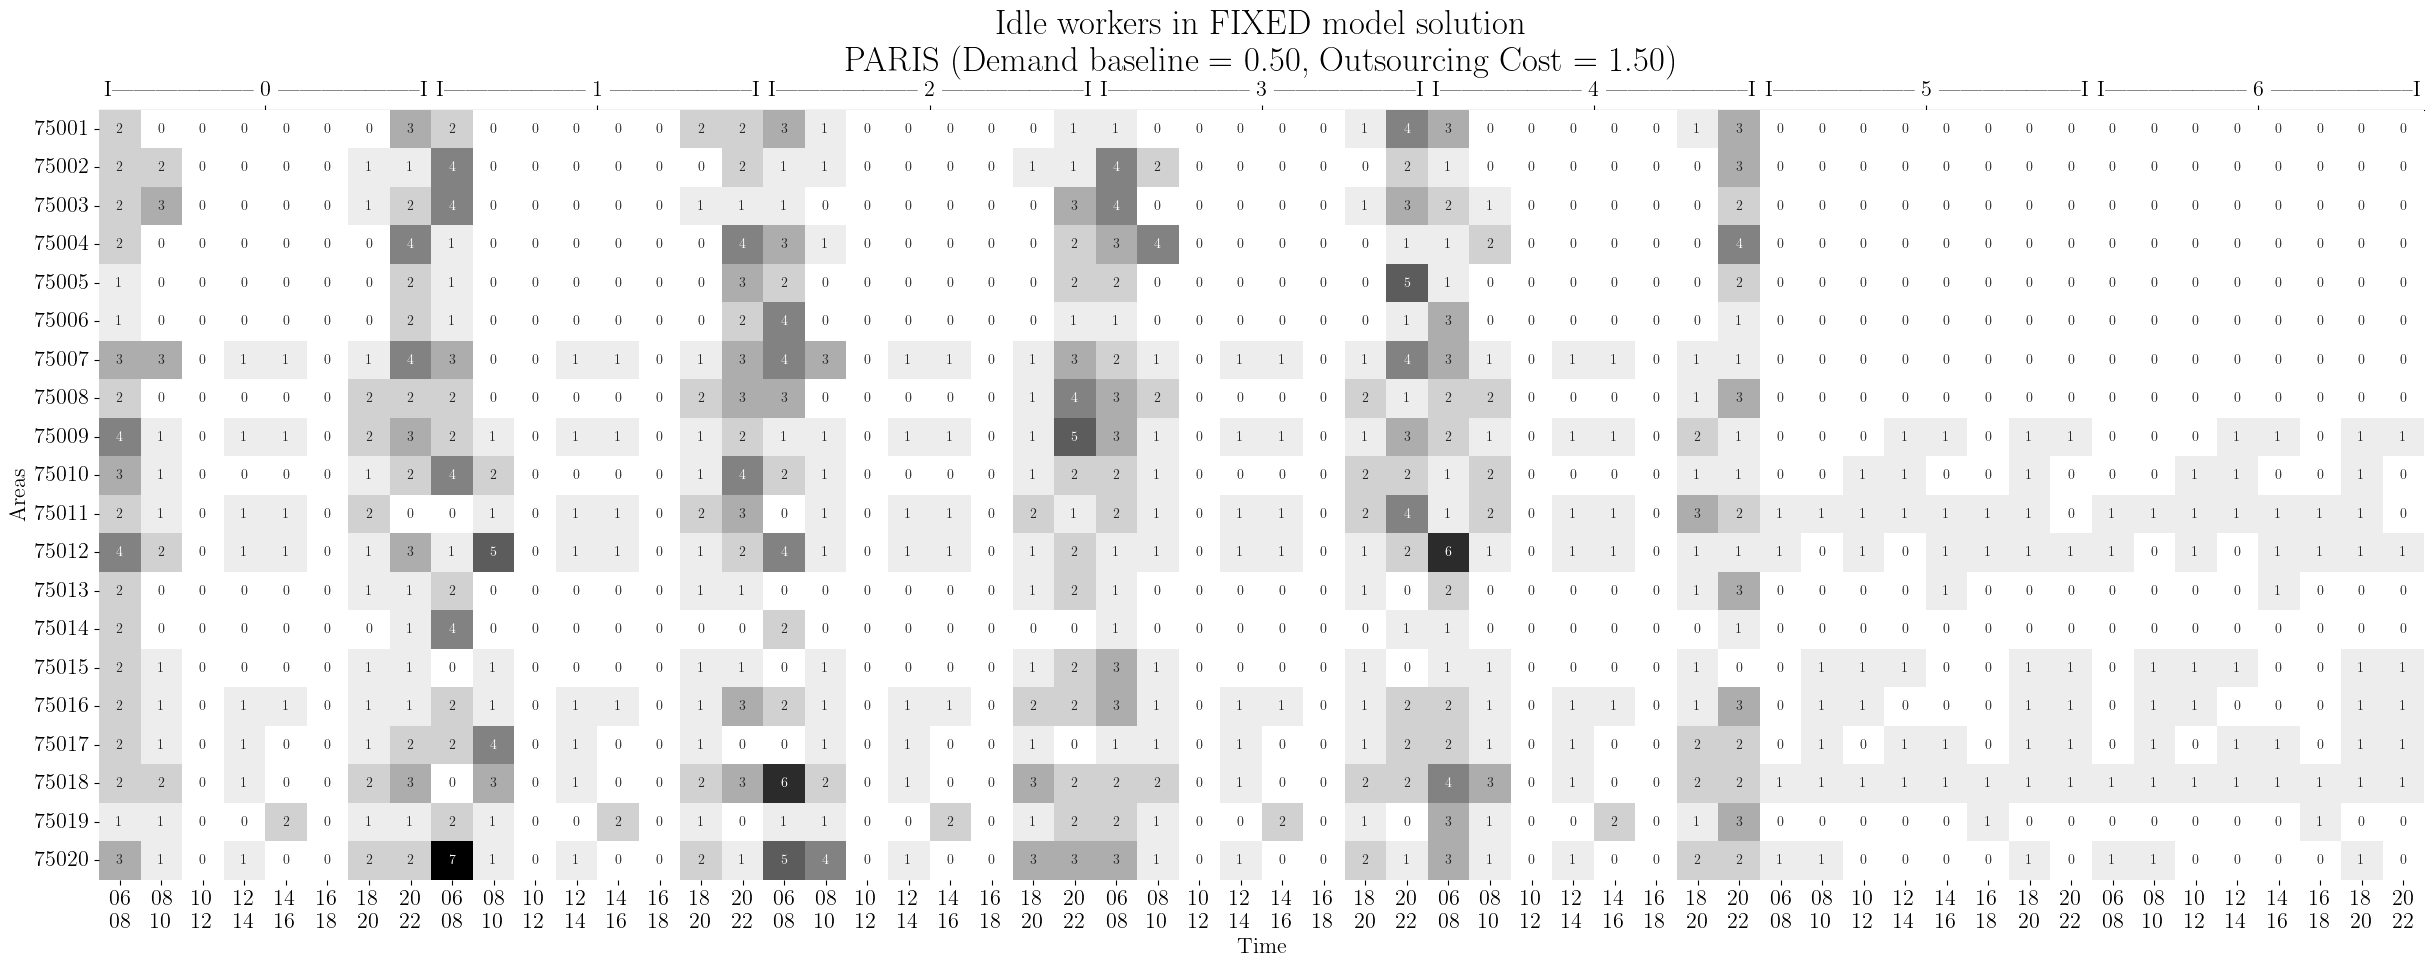

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(idle.astype(int), annot=True, ax=axs, cbar=False, cmap='Greys')

title = f"Idle workers in FIXED model solution \n {city.upper()} (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_area_fixed_idle.pdf', dpi=96, bbox_inches='tight')

plt.show()

In [ ]:
couriers = pd.read_csv(f"/content/couriers_area_{city}_db=0.50.csv", index_col=0)
couriers.columns = [col+'_couriers' for col in couriers.columns]

data = pd.read_csv(f"/content/rostering_area_{city}_db=0.50_OC=1.5_model=flex.pkl.csv", index_col=0)
pt = pd.pivot(data, index="area_id", columns='day_period', values="employee")

idle = pd.concat([pt, couriers], axis='columns')
sel_cols = []
for col in pt.columns:
  sel_cols.append('idle_'+col)
  idle['idle_'+col] = (idle[col] - idle[col+'_couriers'].fillna(0)).fillna(0)

# Rename
idle = idle[sel_cols]
final_cols = []
for col in idle.columns:
    final_col = col.replace('idle_', '')
    final_cols.append(final_col)
    idle[final_col] = idle[col]

idle = idle[final_cols].clip(0)

<ipython-input-180-ef11fff39312>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idle[final_col] = idle[col]
<ipython-input-180-ef11fff39312>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idle[final_col] = idle[col]
<ipython-input-180-ef11fff39312>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [ ]:
idle.sum().sum()

511.0

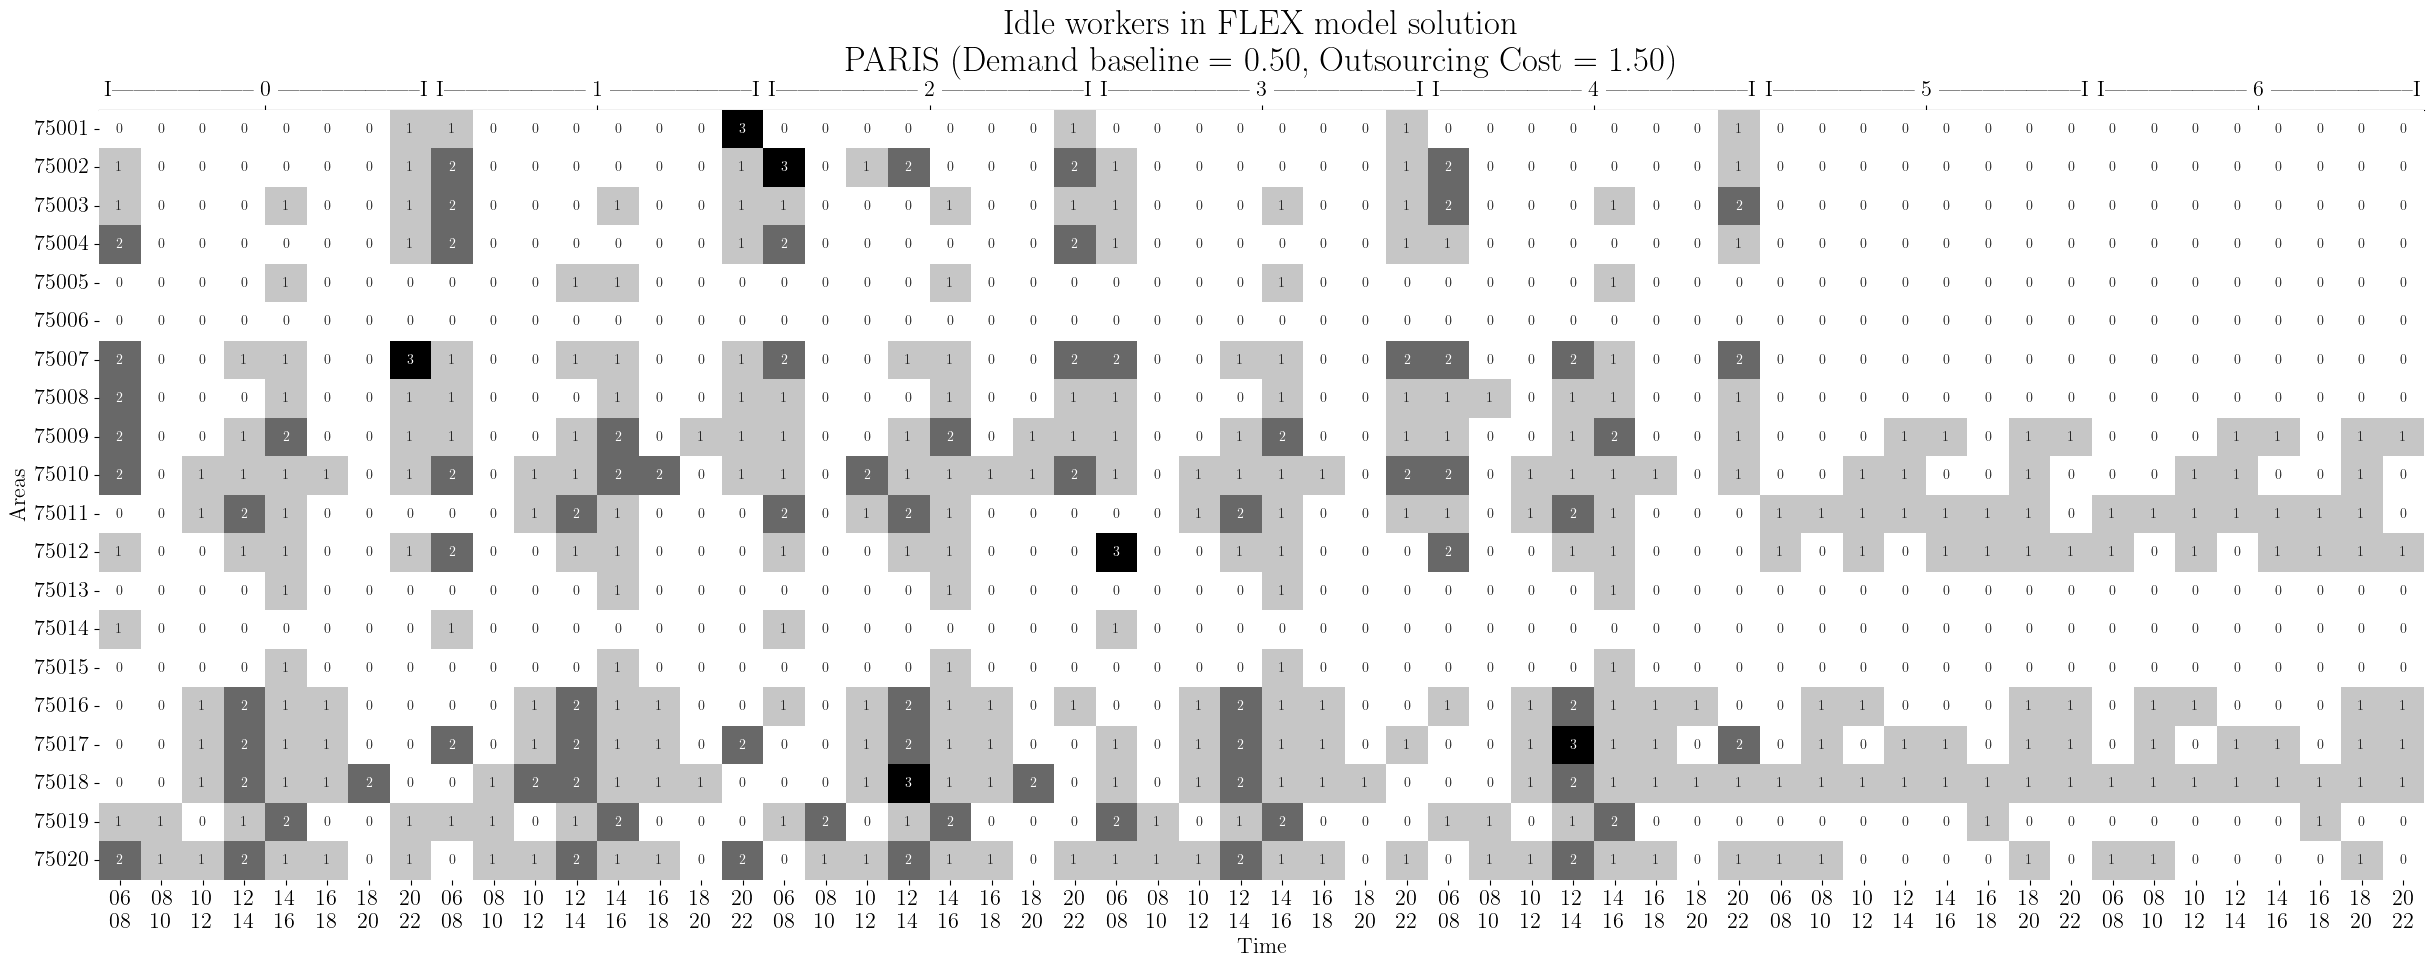

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(30,10))

sns.heatmap(idle.astype(int), annot=True, ax=axs, cbar=False, cmap='Greys')

title = f"Idle workers in FLEX model solution \n {city.upper()} (Demand baseline = 0.50, Outsourcing Cost = 1.50) "
axs.set_title(title, fontsize=title_font)
axs.set_ylabel('Areas', fontsize=16)
axs.set_xlabel('Time', fontsize=16)
plt.yticks(rotation=0)

# Assuming 'day_period' in the pivot table columns includes values like 'Mon_Morning', 'Mon_Afternoon', etc.
# Extract unique day names and periods for secondary x-axis labeling
days = sorted(list(set(label.split('-')[0] for label in pt.columns)))
periods = sorted(list(set(label.split('-')[1] for label in pt.columns)))

all_periods = list(label.split('-')[1] for label in pt.columns)
all_periods = [ f'{int(p)*2+6:02d}' + '\n' + f'{(int(p)+1)*2+6:02d}' for p in all_periods]

spacers = '--------------------'
days = [ 'I' + spacers + '  ' + str(day) + '  '+ spacers + 'I' for day in days]

# Set xticks for the secondary x-axis
axs.set_xticks(np.arange(len(pt.columns)) + 0.5)
axs.set_xticklabels(all_periods, fontsize=16)

# Create secondary x-axis
secax = axs.secondary_xaxis('top')
secax.set_xticks(np.arange(len(days)) * len(periods) + len(periods) / 2)
secax.set_xticklabels(days, fontsize=16)

# Create secondary y-axis
#secay = axs.secondary_yaxis('left')
#secay.set_xticks()
#secay.set_xticklabels(days, fontsize=18)
axs.set_yticklabels(axs.get_yticklabels(), fontsize=16)

#plt.tight_layout()
fig.savefig(f'{city}_area_flex_idle.pdf', dpi=96, bbox_inches='tight')

plt.show()

# Shifts counts

In [ ]:
results_df = pd.read_csv(f'{city}_shifts_db=0.50.csv')

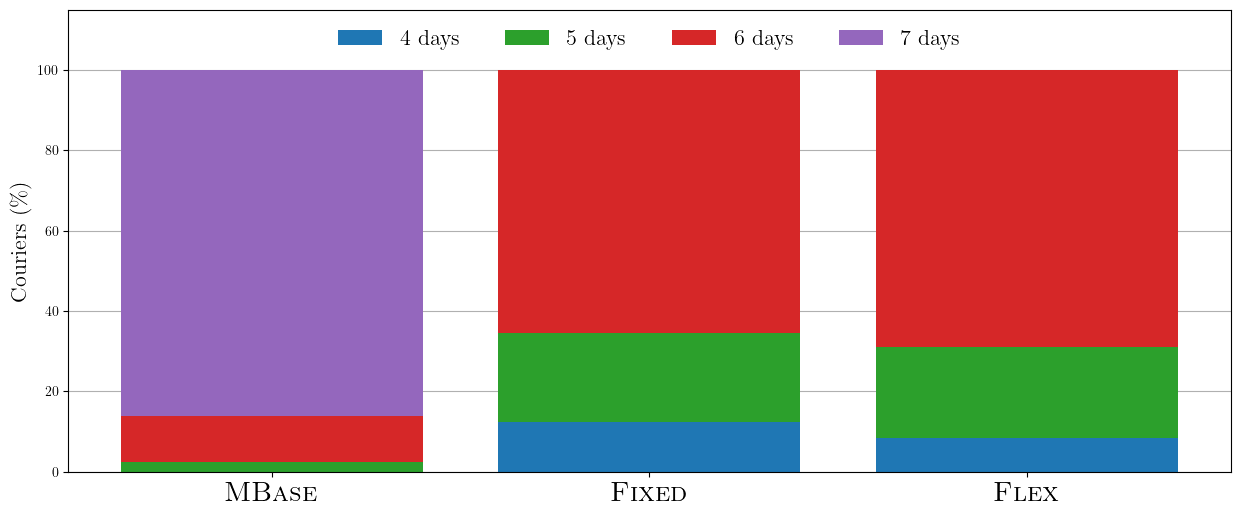

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

models = ['baseline', 'fixed', 'flex']
models_ = [r'\textsc{MBase}', r'\textsc{Fixed}', r'\textsc{Flex}']

fig, ax = plt.subplots(figsize=(15, 6))

data = results_df[results_df['model'].isin(models)]

# Calculate means for each working hour
working_32_means = data.groupby('model', observed=True)['working_32'].mean().sort_index()
working_40_means = data.groupby('model', observed=True)['working_40'].mean().sort_index()
working_48_means = data.groupby('model', observed=True)['working_48'].mean().sort_index()
working_56_means = data.groupby('model', observed=True)['working_56'].mean().sort_index()

# Plot the bars
ticks = range(len(models))
bottom = 0

ax.bar(
    x=ticks,
    height=working_32_means,
    bottom=bottom,
    color=f"C{0}",
    linewidth=2,
    edgecolor=None,
    label='4 days'
)

bottom += working_32_means
ax.bar(
    x=ticks,
    height=working_40_means,
    bottom=bottom,
    color=f"C{2}",
    linewidth=2,
    edgecolor=None,
    label='5 days'
)

# avoid 7 because we dont reach 100%
working_48_means['flex'] = 100 - working_40_means['flex'] - working_32_means['flex']
working_48_means['fixed'] = 100 - working_40_means['fixed'] - working_32_means['fixed']

bottom += working_40_means
ax.bar(
    x=ticks,
    height=working_48_means,
    bottom=bottom,
    color=f"C{3}",
    linewidth=2,
    edgecolor=None,
    label='6 days'
)


bottom += working_48_means
ax.bar(
    x=ticks,
    height=100 - bottom,
    bottom=bottom,
    color=f"C{4}",
    linewidth=2,
    edgecolor=None,
    label='7 days'
)

# Customize the plot
ax.set_ylim((0, 115))
ax.set_xticks(ticks)
ax.set_xticklabels(models_, fontsize=20)  # Adjust font size here
ax.set_ylabel('Couriers (\%)', fontsize=16)
ax.yaxis.grid(which='major')
ax.axes.set_axisbelow(True)
ax.set_xlabel('')

ax.legend(loc='upper center', ncols=4, frameon=False, fontsize=16)

fig.savefig('paris_shift_overview.pdf', dpi=96, bbox_inches='tight')

plt.show()